In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('encoded_data.csv')
x = np.array(df.drop(['Arrhythmia'], axis=1))
y = np.array(df['Arrhythmia'])

In [3]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=2, criterion='gini')

In [5]:
import time

0.6287357379462643


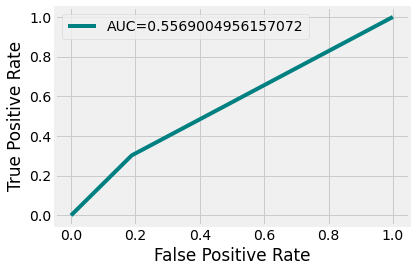

In [6]:
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
test_acc = []
train_acc = []
fit_time = []
score_time = []
p_score = []
r_score = []
f_score = []
conf_mat = []
roc_score = []
#class_report = []
i=0

for train_index, test_index in strat_kfold.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    start_fit = time.time() #record start time
    rfc.fit(x_train_fold, y_train_fold)
    end_fit = time.time() #record end time
    fit_time.append((end_fit-start_fit) * 10**3) #time in ms
    
    start_score = time.time() #record score time
    y_predict = rfc.predict(x_test_fold)
    end_score = time.time() #record end score time
    score_time.append((end_score-start_score) * 10**3) #time in ms
    
    #scorings
    accuracy_test = accuracy_score(y_test_fold, y_predict)
    test_acc.append(accuracy_test)
    
    f_score.append(f1_score(y_test_fold, y_predict, average='weighted')) #f1 score
    p_score.append(precision_score(y_test_fold, y_predict, average='weighted')) #precission score
    r_score.append(recall_score(y_test_fold, y_predict, average='weighted')) #recall score
    #class_report.append(classification_report(y_test_fold, y_predict)) #classification report
    conf_mat.append(confusion_matrix(y_test_fold, y_predict)) #confusion matrix
    roc_score.append(roc_auc_score(y_test_fold, y_predict)) #auc
    
    #roc curve
    plt.clf()
    plt.cla()
    fpr, tpr, _ = roc_curve(y_test_fold, y_predict)
    auc = roc_auc_score(y_test_fold, y_predict)
    plt.rcParams['figure.figsize'] = [11, 5]
    plt.plot(fpr, tpr, label="AUC="+str(auc), color = 'teal')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.style.use('fivethirtyeight')
    plt.tight_layout()
    plt.savefig(f'Results with all features/Before HP/roc_curve{i}')
    i+=1
    
    
    #train accuracy
    y_train_predict = rfc.predict(x_train_fold)
    accuracy_train = accuracy_score(y_train_fold, y_train_predict)
    train_acc.append(accuracy_test)

print(np.array(test_acc).mean())

In [7]:
scorings = {'test_acc':test_acc,'train_acc':train_acc, 'fit_time': fit_time, 'score_time':score_time, 'f_score': f_score,
           'p_score':p_score, 'r_score':r_score, 'conf_mat': conf_mat, 'roc_score':roc_score}
df_scores = pd.DataFrame(scorings)
df_scores.to_csv('Results with all features/Before HP/results.csv', index=False)